In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score


In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 102.1 MB/s eta 0:

In [ ]:
df=pd.read_csv('/content/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.isna().any().values

array([ True, False, False, False,  True, False, False,  True, False,
       False])

In [ ]:
df.shape

(3276, 10)

In [ ]:
l=list(df.columns)
l=l[:-1]
l

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

In [ ]:
df1=df.dropna()
df1.shape

(2011, 10)

In [ ]:
def fun(x):
  figure = px.histogram(df, x = x,
                      color = "Potability",
                      title= "Factors Affecting Water Quality:"+x)
  figure.show()

In [ ]:
for i in l:
  fun(i)

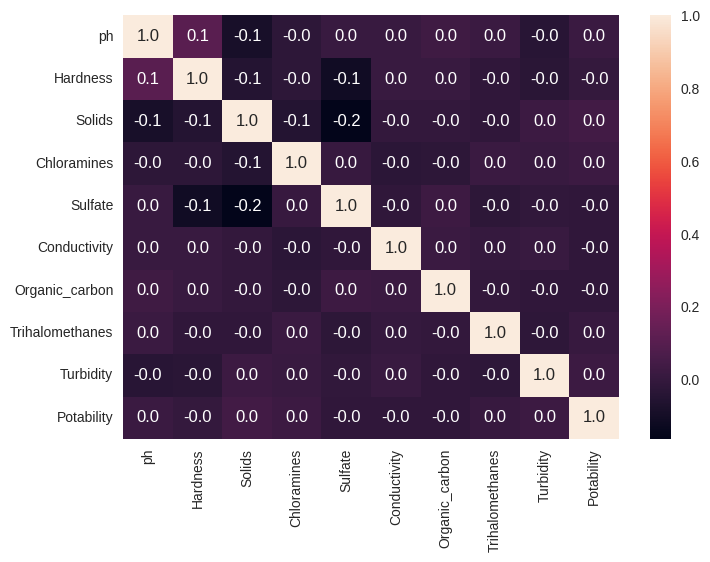

In [ ]:
sns.heatmap(df.corr(), annot = True,fmt='.1f')
plt.show()

In [ ]:
def show_boxplots(columns: list, data: pd.DataFrame, nrows: int = 3, ncols: int = 3):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 15))
    axes = axes.ravel()
    for index, column in enumerate(columns):
        axes[index].boxplot(data[column])
        axes[index].set_title(column)

    plt.tight_layout()
    plt.show()

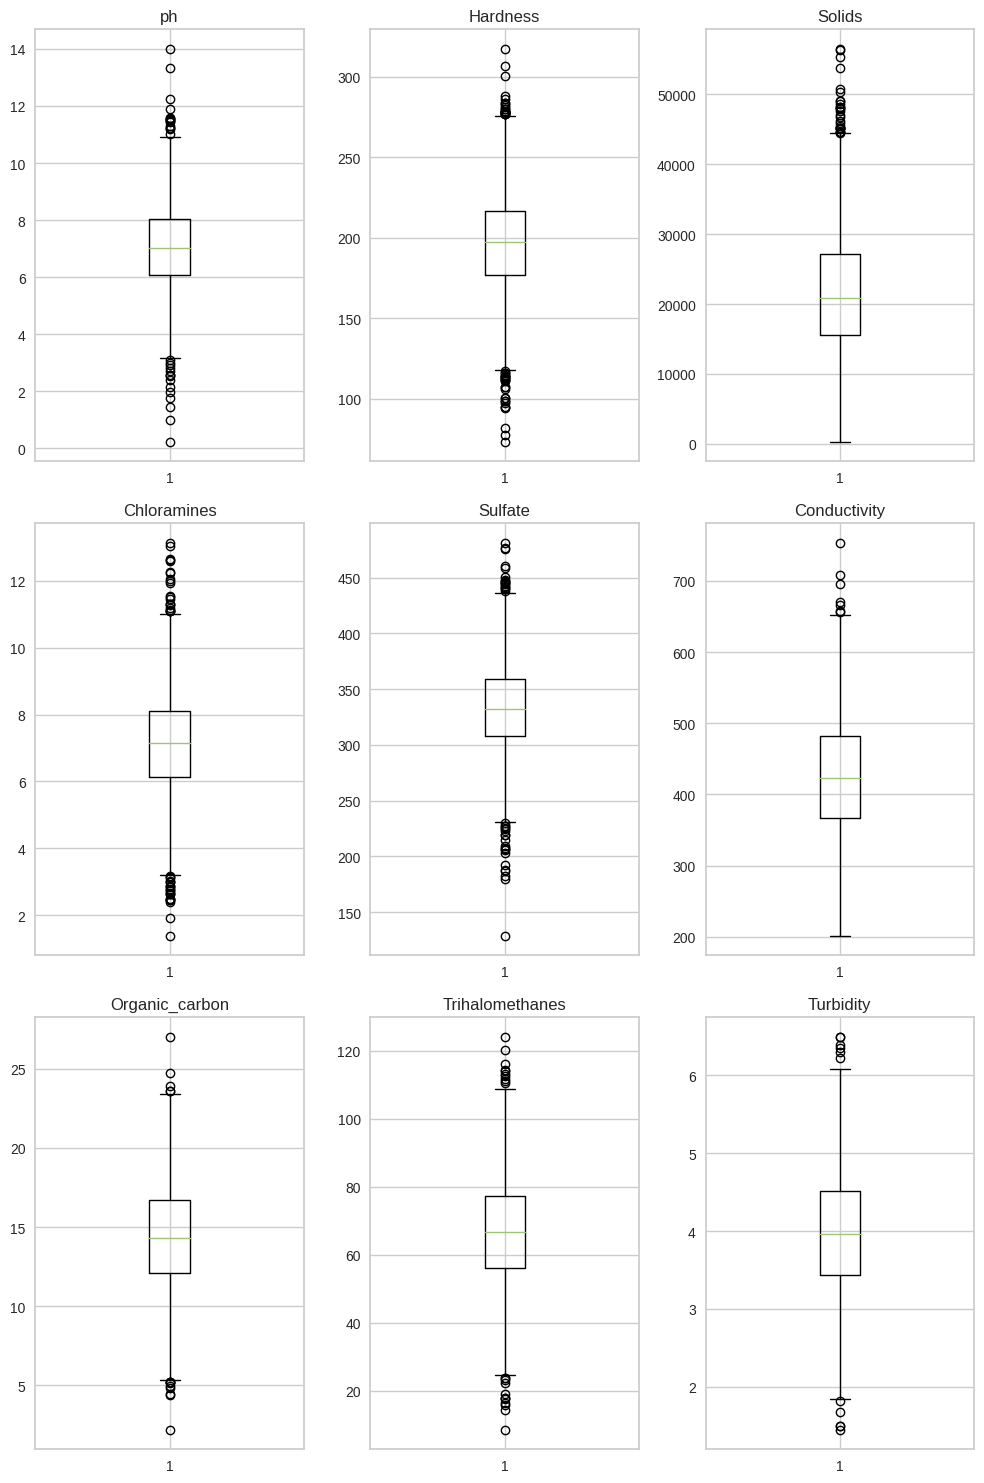

In [ ]:
show_boxplots(df.columns[:-1], df)

In [ ]:
def visualize_isolation_forest(columns: list, data: pd.DataFrame, contamination: list,nrows: int = 2, ncols: int = 3,):
    sns.set_style("darkgrid")
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5))
    axes = axes.ravel()
    for index, i in enumerate(contamination):
        model = IsolationForest(contamination=i)
        model.fit(data.to_numpy())
        sns.scatterplot(data = data[model.predict(data.to_numpy()) == -1], x = columns[0], y = columns[1], color='blue', label='Outlier', ax = axes[index])
        sns.scatterplot(data = data[model.predict(data.to_numpy()) == 1], x = columns[0], y = columns[1], color='red', label='Normal', ax = axes[index])
        axes[index].legend()
        axes[index].set_title(f"Contamination Value: {round(i,3)}")
    plt.show()

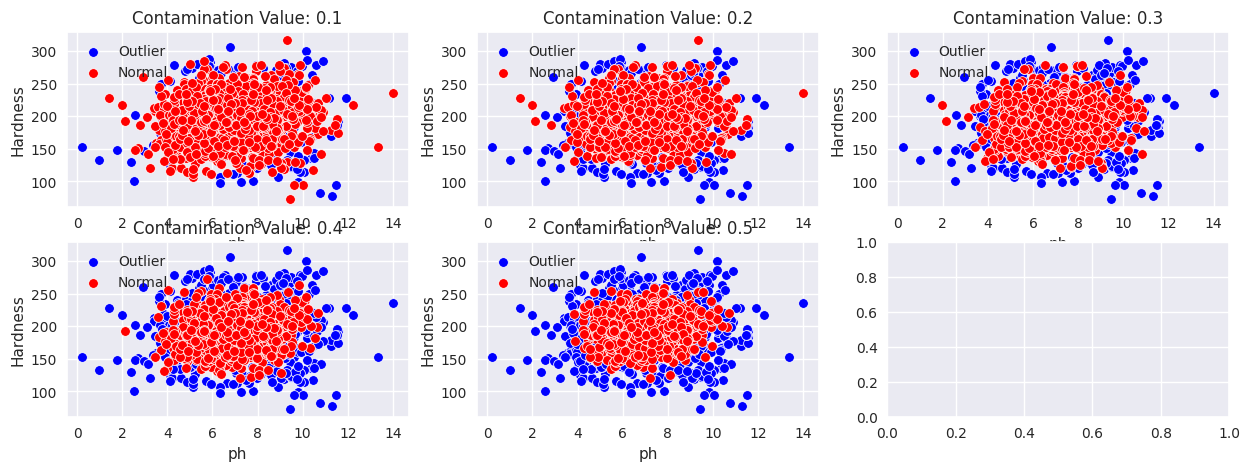

In [ ]:
contamination = np.arange(0.1, 0.6, 0.1)
visualize_isolation_forest(["ph", "Hardness"], df,contamination)

In [ ]:
X,y=df[df.columns[::-1]],df["Potability"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
models = [RandomForestClassifier(), LogisticRegression(), AdaBoostClassifier(), KNeighborsClassifier(), QuadraticDiscriminantAnalysis(), GaussianNB(), SVC(probability=True), DecisionTreeClassifier()]
pipelines = {}
for model in models:
    model_name = str(model.__class__).split(".")[-1].split("'")[0]
    pipe = Pipeline([
        ("scaler", StandardScaler()),  # Preprocessing step
        ("classifier", model)  # Classifier step
    ])
    pipelines[model_name] = pipe


for name,pipe in pipelines.items():
    print(f"Training {name}")
    scores = cross_val_score(pipe, X_train, y_train, cv = 5, scoring = "accuracy")
    print(f"Mean Score {scores.mean()} -- Std {scores.std()} -- Min {scores.min()} -- Max {scores.max()}")

Training RandomForestClassifier
Mean Score 1.0 -- Std 0.0 -- Min 1.0 -- Max 1.0
Training LogisticRegression
Mean Score 1.0 -- Std 0.0 -- Min 1.0 -- Max 1.0
Training AdaBoostClassifier
Mean Score 1.0 -- Std 0.0 -- Min 1.0 -- Max 1.0
Training KNeighborsClassifier
Mean Score 0.9986754966887418 -- Std 0.001622178637604762 -- Min 0.9966887417218543 -- Max 1.0
Training QuadraticDiscriminantAnalysis
Mean Score 1.0 -- Std 0.0 -- Min 1.0 -- Max 1.0
Training GaussianNB
Mean Score 1.0 -- Std 0.0 -- Min 1.0 -- Max 1.0
Training SVC
Mean Score 1.0 -- Std 0.0 -- Min 1.0 -- Max 1.0
Training DecisionTreeClassifier
Mean Score 1.0 -- Std 0.0 -- Min 1.0 -- Max 1.0


In [ ]:
from pycaret.classification import *
clf = setup(df, target = "Potability")
compare_models()

,Description,Value
0,Session id,3708
1,Target,Potability
2,Target type,Binary
3,Original data shape,"(2011, 10)"
4,Transformed data shape,"(2011, 10)"
5,Transformed train set shape,"(1407, 10)"
6,Transformed test set shape,"(604, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6859,0.7122,0.4005,0.6923,0.5050,0.2992,0.3240,0.0610
rf,Random Forest Classifier,0.6766,0.7127,0.3846,0.6744,0.4888,0.2777,0.3016,0.9820
lightgbm,Light Gradient Boosting Machine,0.6766,0.7135,0.4973,0.6274,0.5531,0.3052,0.3115,1.7050
et,Extra Trees Classifier,0.6737,0.7199,0.3738,0.6736,0.4796,0.2694,0.2949,0.5960
xgboost,Extreme Gradient Boosting,0.6518,0.6883,0.4603,0.5872,0.5153,0.2500,0.2549,0.6470
gbc,Gradient Boosting Classifier,0.6432,0.6648,0.3279,0.6125,0.4246,0.1988,0.2208,0.8070
nb,Naive Bayes,0.6191,0.5953,0.2595,0.5606,0.3531,0.1329,0.1531,0.0610
ridge,Ridge Classifier,0.6034,0.0000,0.0318,0.5258,0.0588,0.0247,0.0593,0.0530
lda,Linear Discriminant Analysis,0.6027,0.5014,0.0336,0.5458,0.0619,0.0240,0.0600,0.0680
dummy,Dummy Classifier,0.5970,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0650


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)